In [56]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 定义超参数

In [57]:
# hyper parameters
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12


## 创建数据

In [58]:
srcx = torch.linspace(-1,1,100)
x = torch.unsqueeze(srcx,dim=1) # torch只处理二维数据，所以要把数据升维

y = x.pow(2) + 0.2 * torch.rand(x.size())
srcx.shape,x.shape,y.shape

(torch.Size([100]), torch.Size([100, 1]), torch.Size([100, 1]))

## 观察数据

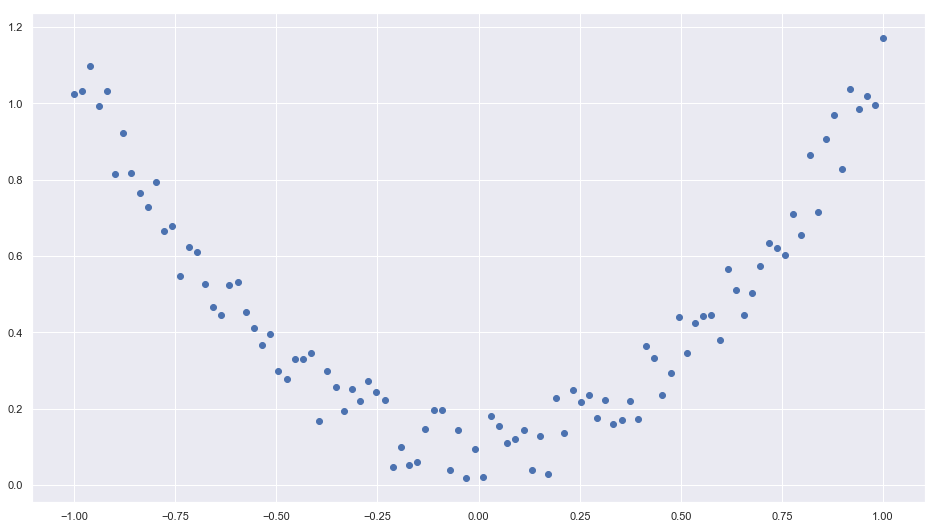

In [59]:
plt.figure(figsize=(16,9))
plt.scatter(x,y)

In [60]:
#optimzer = torch.optim.SGD()
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset
    ,batch_size= BATCH_SIZE
    , shuffle = True
    ,num_workers=1
)

In [61]:
class RegressionNeuralNetwork(torch.nn.Module): # torch.nn.Module net的主模块
    def __init__(self,n_features,n_hidden,n_output):
        '''
        n_features 数据个数
        n_hidden 隐藏层的神经元的个数
        n_output
        '''
        super(RegressionNeuralNetwork,self).__init__() #要继承模块的信息
        self.hidden = torch.nn.Linear(n_features,n_hidden) # 隐藏层，输入的内容是他有多少哥输入和输出
        self.predict = torch.nn.Linear(n_hidden,n_output) # 输出预测层，输入的内容是

    def forward(self,x):
        '''前向传播'''
        x = F.relu(self.hidden(x)) #过一遍hidden传入上面定义的线性神经网络处理的函数中
        x = self.predict(x)
        return x

## 建立网络

In [62]:
net_SGD = RegressionNeuralNetwork(1,20,1)
net_Momentum = RegressionNeuralNetwork(1,20,1)
net_RMSprop = RegressionNeuralNetwork(1,20,1)
net_Adam = RegressionNeuralNetwork(1,20,1)
nets = [net_SGD,net_Momentum,net_RMSprop,net_Adam]

## 建立优化器

In [63]:
opt_SGD = torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers = [opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]

## 运行网络

0
1
2
3
4
5
6
7
8
9
10
11


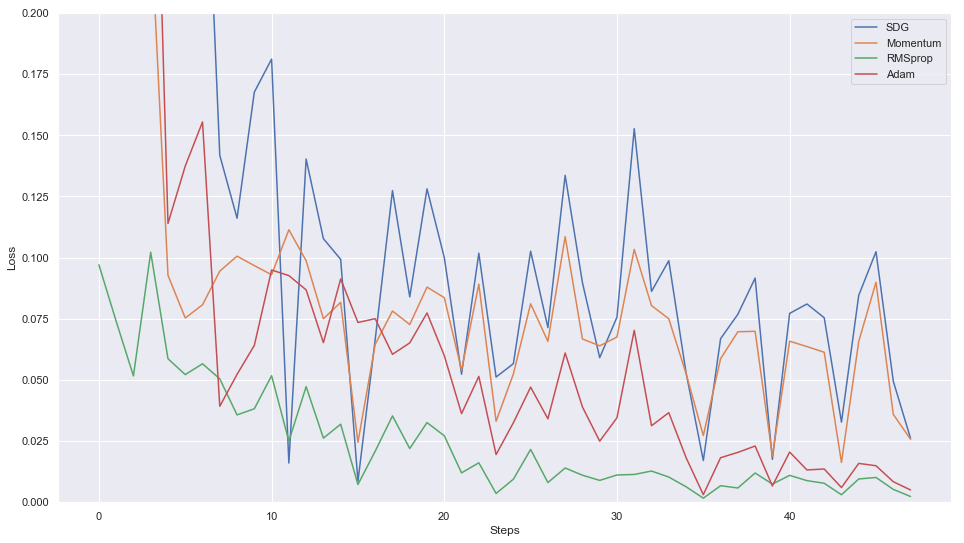

In [64]:
loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]] #record loss
opts = []
for epoch in range(EPOCH):
    print(epoch)
    for step,(batch_x,bathc_y) in enumerate(loader):
        b_x , b_y = Variable(batch_x) ,Variable(bathc_y)
        for net , opt , l_his in zip(nets,optimizers,losses_his):
            output = net(b_x)
            loss = loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data.item())
        opts.append(output)
labels = ['SDG','Momentum','RMSprop','Adam']
plt.figure(figsize=(16,9))
for i , l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()

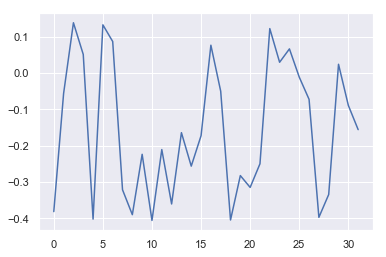

In [65]:
plt.plot(opts[0].data.numpy())